In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Monte-Carlo Explorations
Monte-Carlo is a simulation method used to explore outcomes in large possibility space.
This document explore some monte carlo simulations for some day to day
events.

## Monte-Carlo Simulations of Stock Prices
First let plot a typical normal distribution.
I'll be using this distribution to pick a random growth scenario.
The distribution will be centered at the mean avg growth of the stock and
the standard devation should model how volatile the stock price is.

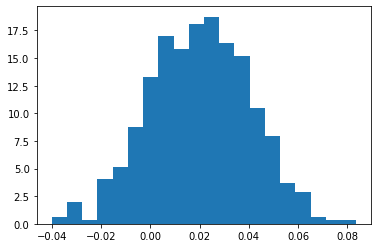

In [87]:
s = np.random.normal(0.02, 0.02, 1000)
plt.hist(s, 20, density=True)
plt.show()

Now a function to simulate possible price outcomes for the stock
in a given period of time.

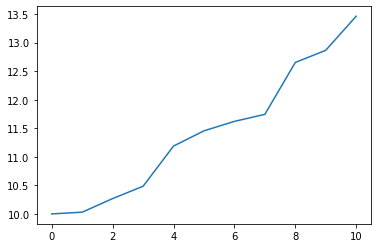

In [83]:
def sim_stock(stock_price, avg_stock_growth, volatility_index, time=100):
    sim_growth = np.random.normal(avg_stock_growth, volatility_index, time)
    prices = []
    current_price = stock_price
    prices.append(current_price)
    for i in sim_growth:
        growth = 1 + i
        #print(f'{i*100}%')
        current_price = current_price * growth
        prices.append(current_price)
    return prices
p = sim_stock(10, 0.02, 0.02, 10)
plt.plot(p)
plt.show()

Now a function to simulate multiple of those scenarios and plot them.

In [92]:
def sim_scenario(scenario_sim, args, times=1):
    all_res = []
    for i in range(times):
        all_res.append(scenario_sim(*args))
    return all_res
def plot_scenarios(scn):
    for v in scn:
        plt.plot(v)
    plt.show()

Let's plot different scenarios

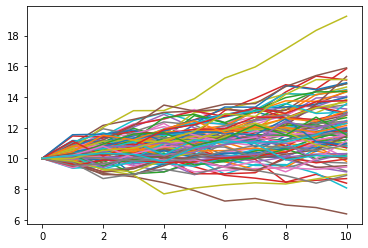

In [93]:
res = sim_scenario(sim_stock, [10, 0.02, 0.05, 10], 100)
plot_scenarios(res)

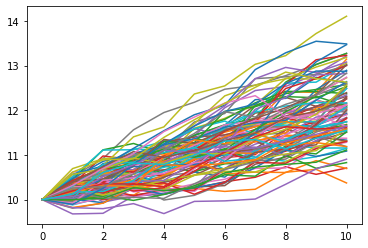

In [94]:
plot_scenarios(sim_scenario(sim_stock, [10, 0.02, 0.02, 10], 100))

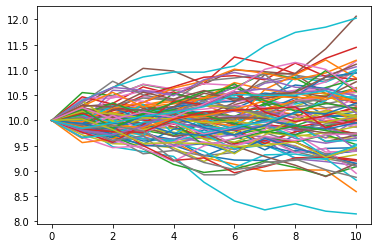

In [95]:
plot_scenarios(sim_scenario(sim_stock, [10, 0, 0.02, 10], 100))